In [2]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from utils import calculate_income_1000_customers
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
TRAIN_SIZE = 0.8

# Random Forest

In [4]:
np.random.seed(0)
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

N_ITER = 1

## Grid Search for different feature sets

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)

In [8]:
num_features = [2, 3, 4, 5, 6]

accuracies = {n: [] for n in num_features} 
accuracies_top = {n: [] for n in num_features} 
income = {n: [] for n in num_features} 

for _ in range(N_ITER):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    for n in num_features:
        selected = [100 + i for i in range(1, n+1)]
        print("Features: ", selected)

        model.fit(X_train[:, selected], y_train)
        y_pred = model.predict(X_test[:, selected])
        y_proba = model.predict_proba(X_test[:, selected])
        
        accuracies_top[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
        income[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
        
        accuracies[n].append(accuracy_score(y_test, y_pred))

        print("Params: ", model.best_params_)

Features:  [101, 102]
Params:  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}
Features:  [101, 102, 103]
Params:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}
Features:  [101, 102, 103, 104]
Params:  {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 100}
Features:  [101, 102, 103, 104, 105]
Params:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Features:  [101, 102, 103, 104, 105, 106]
Params:  {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}


In [9]:
avg_accuracies = [np.mean(accuracies[n]) for n in num_features]
avg_accuracies_top = [np.mean(accuracies_top[n]) for n in num_features]
avg_income = [np.mean(income[n]) for n in num_features]

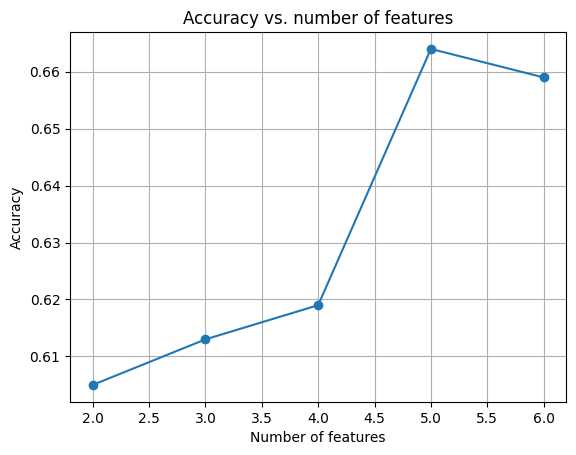

In [10]:
plt.plot(num_features, avg_accuracies, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of features')
plt.grid(True)
plt.show()

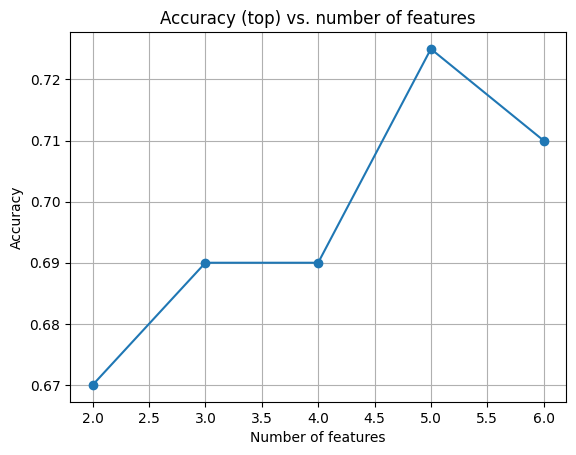

In [11]:
plt.plot(num_features, avg_accuracies_top, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy (top) vs. number of features')
plt.grid(True)
plt.show()

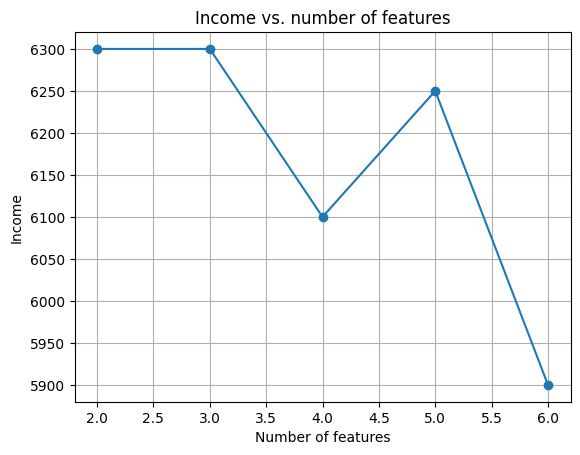

In [12]:
plt.plot(num_features, avg_income, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Income')
plt.title('Income vs. number of features')
plt.grid(True)
plt.show()

In [13]:
print(max(avg_income))

6300.0


## GridSearch for [102, 103, 105]

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
np.random.seed(0)

In [8]:
selected = [102, 103, 105]

accuracies = []
accuracies_top = []
income = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

model.fit(X_train[:, selected], y_train)
y_pred = model.predict(X_test[:, selected])
y_proba = model.predict_proba(X_test[:, selected])

p = model.best_params_
print(p)

model = RandomForestClassifier(n_estimators=p['n_estimators'], max_depth=p['max_depth'], criterion=p['criterion'])
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))


{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 200}


In [10]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [11]:
avg_income

[6716.1]

## GridSearch for [101, 102, 103, 105]

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

model = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=param_grid, cv=5)
np.random.seed(0)

In [13]:
selected = [101, 102, 103, 105]

accuracies = []
accuracies_top = []
income = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

model.fit(X_train[:, selected], y_train)
y_pred = model.predict(X_test[:, selected])
y_proba = model.predict_proba(X_test[:, selected])

p = model.best_params_
print(p)

model = RandomForestClassifier(n_estimators=p['n_estimators'], max_depth=p['max_depth'], criterion=p['criterion'])
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))


{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 200}


In [14]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [15]:
avg_income

[6638.15]